In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Prati5/WeatherPrediction/master/weather.csv")

In [3]:
df.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [5]:
import numpy as np
import matplotlib.pyplot as plt  

In [8]:
temp=df['temperaturemin']
precipitation=df['precipitation']

In [10]:
df.head(10)

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No
5,2011-03-19,55.9,75.0,0.00,0.0,0.0,5.82,40.0,17.90,50.0,...,No,No,No,No,No,No,No,No,No,No
6,2011-03-21,52.0,75.0,0.00,0.0,0.0,12.75,240.0,27.96,240.0,...,No,No,No,No,No,No,No,No,No,No
7,2011-03-23,50.0,82.9,0.45,0.0,0.0,6.71,230.0,25.95,220.0,...,No,No,No,No,Yes,No,No,No,No,No
8,2011-03-30,39.9,48.0,1.05,0.0,0.0,7.83,100.0,21.92,100.0,...,Yes,No,No,No,No,No,No,No,No,No
9,2011-04-01,37.9,55.0,0.00,0.0,0.0,6.26,280.0,17.90,290.0,...,No,No,No,No,No,No,No,No,No,No


In [11]:
x = np.array(temp).reshape(-1, 1)
y = np.array(precipitation)

In [13]:
#Splitting the data into Train and Test
#from sklearn.cross_validation import train_test_split in earlier version
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=1/3, random_state=0 )

In [15]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [16]:
regressor.coef_ , regressor.intercept_# y = mx + c , m is coef , c is intercept

(array([0.00272922]), -0.00979683568563755)

In [17]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([35.1]), 0.0, 0.08599882176044454)

In [18]:
regressor.coef_ * xtrain[0] + regressor.intercept_ # y = mx + c

array([0.08599882])

In [19]:
np.sqrt ( sum( abs( actualValue**2 - predictedValue**2 ) ) ) / len( xtrain ) # RMSE
# Root Mean Square Error

0.00720424776737392

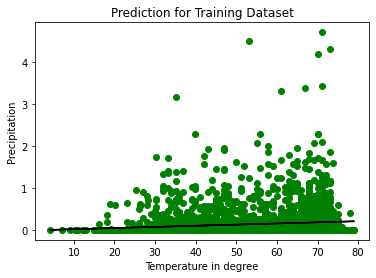

In [20]:
#Visualizing the training Test Results 
# Actual values
plt.scatter(xtrain, ytrain, color='green') # x = xtrain , y = ytrain

#Predicted values
prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'black') # y = prediction

plt.title ("Prediction for Training Dataset")
plt.xlabel("Temperature in degree"), plt.ylabel("Precipitation")
plt.show()

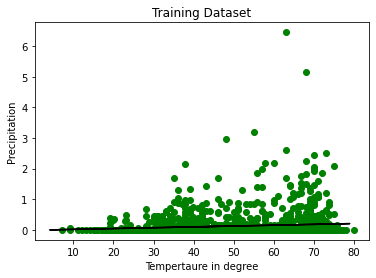

In [21]:
#Visualizing the Test Results 

plt.scatter(xtest, ytest, color= 'green')

plt.plot(xtrain, regressor.predict(xtrain), color = 'black')

plt.title ("Training Dataset")
plt.xlabel("Tempertaure in degree"), plt.ylabel("Precipitation")
plt.show()

In [23]:
d=df['avgwindspeed'].value_counts()

<AxesSubplot:>

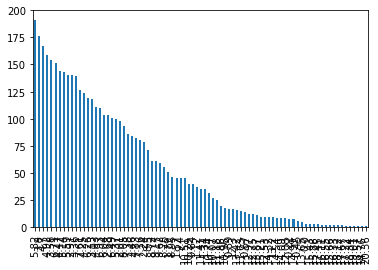

In [24]:
d.plot(kind='bar')